In [1]:
#!pip install pyyaml h5py
import os
import tensorflow as tf
from keras.models import model_from_json
def normalize(img):
    img = img.astype("float32")
    min_perc, max_perc = np.percentile(img, 5), np.percentile(img, 95)
    img_valid = img[(img > min_perc) & (img < max_perc)]
    mean, std = img_valid.mean(), img_valid.std()
    img = (img-mean)/std
    return img
!pip install h5
json_file = open(r'C:\Users\Admin\Downloads\model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(r"C:\Users\Admin\Downloads\model (1).h5")
import cv2
import numpy as np
unet=loaded_model



In [7]:
a=cv2.imread(r"C:\Users\Admin\Desktop\pCT\pCT100.jpg")
gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
m=gray.flatten()
gray=np.expand_dims(gray, axis=2)
gray=np.expand_dims(gray, axis=0)
gray=normalize(gray)
k=unet.predict(gray)

p=k[:,:,:,3].flatten()
for i in range(len(p)):
  if(p[i]==0):
    m[i]=255
m=np.reshape(m,(512,512))
%matplotlib inline
# plot_hists(k)
# k=np.reshape(k,(1,512,512,4))
import matplotlib.pyplot as plt
g=gray.reshape(512,512)

ValueError: cannot reshape array of size 1048576 into shape (512,512)

(1, 512, 512, 4)


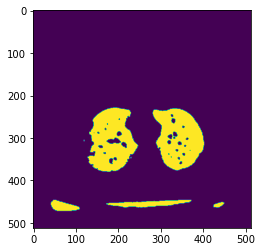

In [14]:
def filter_pixels(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[3]):
            for k in range(img.shape[1]):
                for l in range(img.shape[2]):
                    img[i,k,l,j] = 1 if (img[i,k,l,j] > 0.5) else 0;
    return img

pred_y = filter_pixels(k)
plt.imshow(pred_y[0,:,:,0])
print(pred_y.shape)

In [6]:
import SimpleITK as sitk
#plt.imshow(pred_y[0,:,:,0])
gray=gray.reshape(512,512,1)
pred_y=pred_y[0,:,:,0]
pred_y=pred_y.reshape(512,512,1)
sitk_image=sitk.GetImageFromArray(gray)
sitk_mask = sitk.GetImageFromArray(pred_y)
writer = sitk.ImageFileWriter()
writer.SetFileName("yo.nii")
writer.Execute(sitk_image)
writer.SetFileName("yolo.nii")
writer.Execute(sitk_mask)

In [40]:
import pyradiomics


ModuleNotFoundError: No module named 'pyradiomics'